# Aplastic anemia, NK cells

EG34, EG35 and EG36 are aplastic anemia cases. EG34 and EG36 samples are from the same donor. 

In this notebook samples are merged together and UMAPs are generated based on RNA, proteins or latent space. NK and B cell clusters are defined based on marker genes and proteins. 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



In [39]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG34_norm.h5ad')

In [40]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG36_norm.h5ad')

In [41]:
#Easigenomics dataset, only one sample

adata2 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG35_norm.h5ad')

In [42]:
adata

AnnData object with n_obs × n_vars = 1112 × 11960
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [43]:
adata1

AnnData object with n_obs × n_vars = 2169 × 13291
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [44]:
adata2

AnnData object with n_obs × n_vars = 2188 × 14373
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [45]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [46]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

In [47]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata2, use_rep="X_totalVI")    

sc.tl.umap(adata2)

EG34


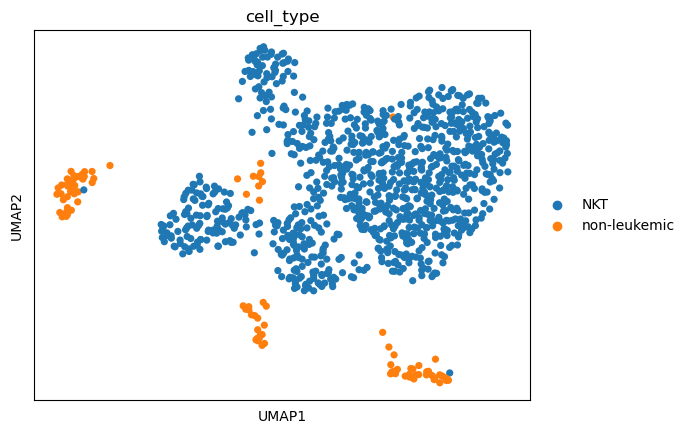

EG35


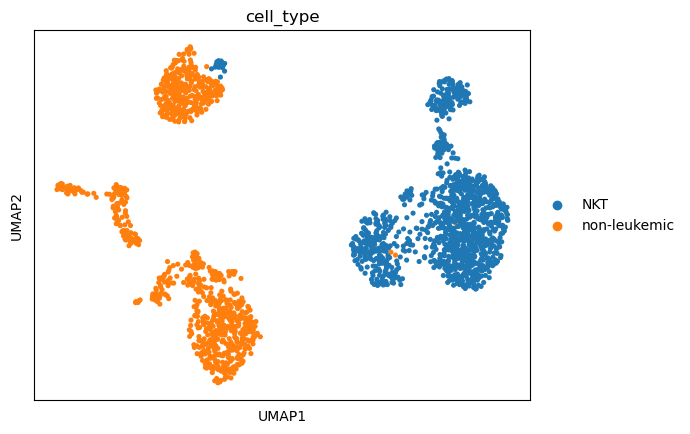

EG36


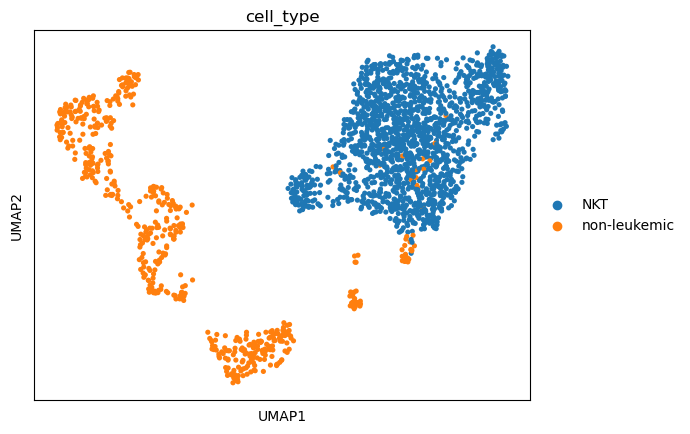

In [48]:
#latent space

print("EG34")
sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')


print("EG35")
sc.pl.umap(adata2, color = ['cell_type'], color_map = 'viridis')

print("EG36")
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

In [49]:
adata_merged = adata.concatenate(adata1, adata2, index_unique=None)

In [50]:
adata_merged.obs['cell_type']

AAACCTGCAAAGCGGT-1-148             NKT
AAACCTGCAGAGCCAA-1-148             NKT
AAACGGGTCAAGAAGT-1-148             NKT
AAACGGGTCAGAGACG-1-148    non-leukemic
AAAGATGAGCACGCCT-1-148             NKT
                              ...     
TTTGGTTCACGCATCG-1-100             NKT
TTTGGTTGTATAATGG-1-100    non-leukemic
TTTGGTTTCCGAAGAG-1-100             NKT
TTTGTCAAGAATTGTG-1-100             NKT
TTTGTCACATTCACTT-1-100             NKT
Name: cell_type, Length: 5469, dtype: category
Categories (2, object): ['NKT', 'non-leukemic']

In [51]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [52]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [53]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [54]:
adata_merged

AnnData object with n_obs × n_vars = 5469 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm

In [56]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

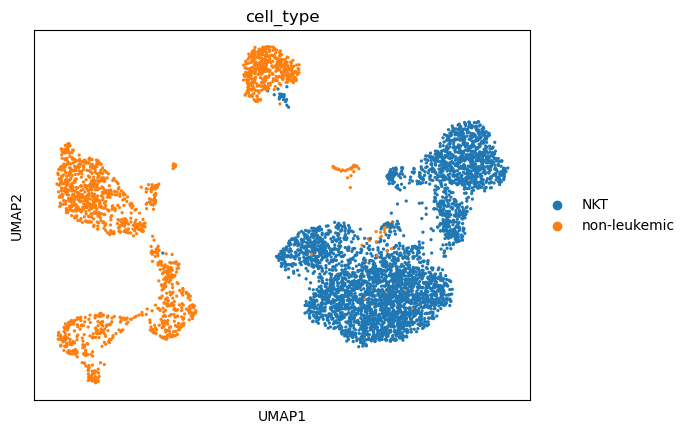

In [57]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

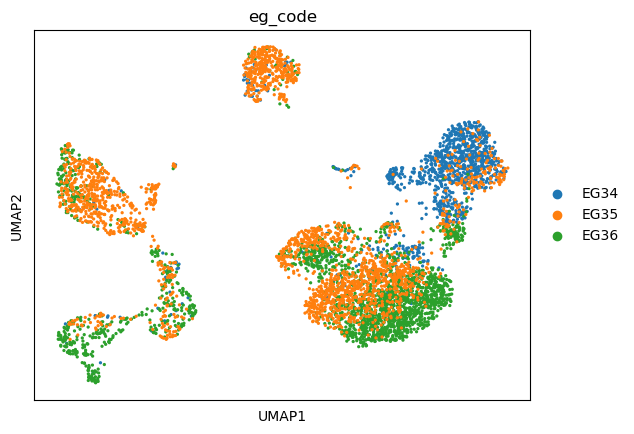

In [58]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [59]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [60]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [61]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



FGFBP2
FCGR3A
S1PR5
KLRC1
KLRC3
KLRD1
GNLY
GZMB
CX3CR1
GPR56
PRF1
KLRB1
SPON2
NKG7
TTC38
FCRL6
LILRB1
PLAC8
MBP


In [62]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




GZMK
GZMA
KLRB1
GZMH
LAG3
B2M
HLA-DRA
OAS3
MX1
IRF7
MX2
IRF9
OAS1
OAS2
EIF2AK2
TNFRSF18
TNFRSF4
CRTAM
ENTPD1
HAVCR2
TIGIT
TNFSF10
BCL2L11
CCL3
CCL4
TNF
IFNG
CD69


In [63]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['FGFBP2',
 'FCGR3A',
 'S1PR5',
 'KLRC1',
 'KLRC3',
 'KLRD1',
 'GNLY',
 'GZMB',
 'CX3CR1',
 'GPR56',
 'PRF1',
 'KLRB1',
 'SPON2',
 'NKG7',
 'TTC38',
 'FCRL6',
 'LILRB1',
 'PLAC8',
 'MBP',
 'GZMK',
 'GZMA',
 'KLRB1',
 'GZMH',
 'LAG3',
 'B2M',
 'HLA-DRA',
 'OAS3',
 'MX1',
 'IRF7',
 'MX2',
 'IRF9',
 'OAS1',
 'OAS2',
 'EIF2AK2',
 'TNFRSF18',
 'TNFRSF4',
 'CRTAM',
 'ENTPD1',
 'HAVCR2',
 'TIGIT',
 'TNFSF10',
 'BCL2L11',
 'CCL3',
 'CCL4',
 'TNF',
 'IFNG',
 'CD69']

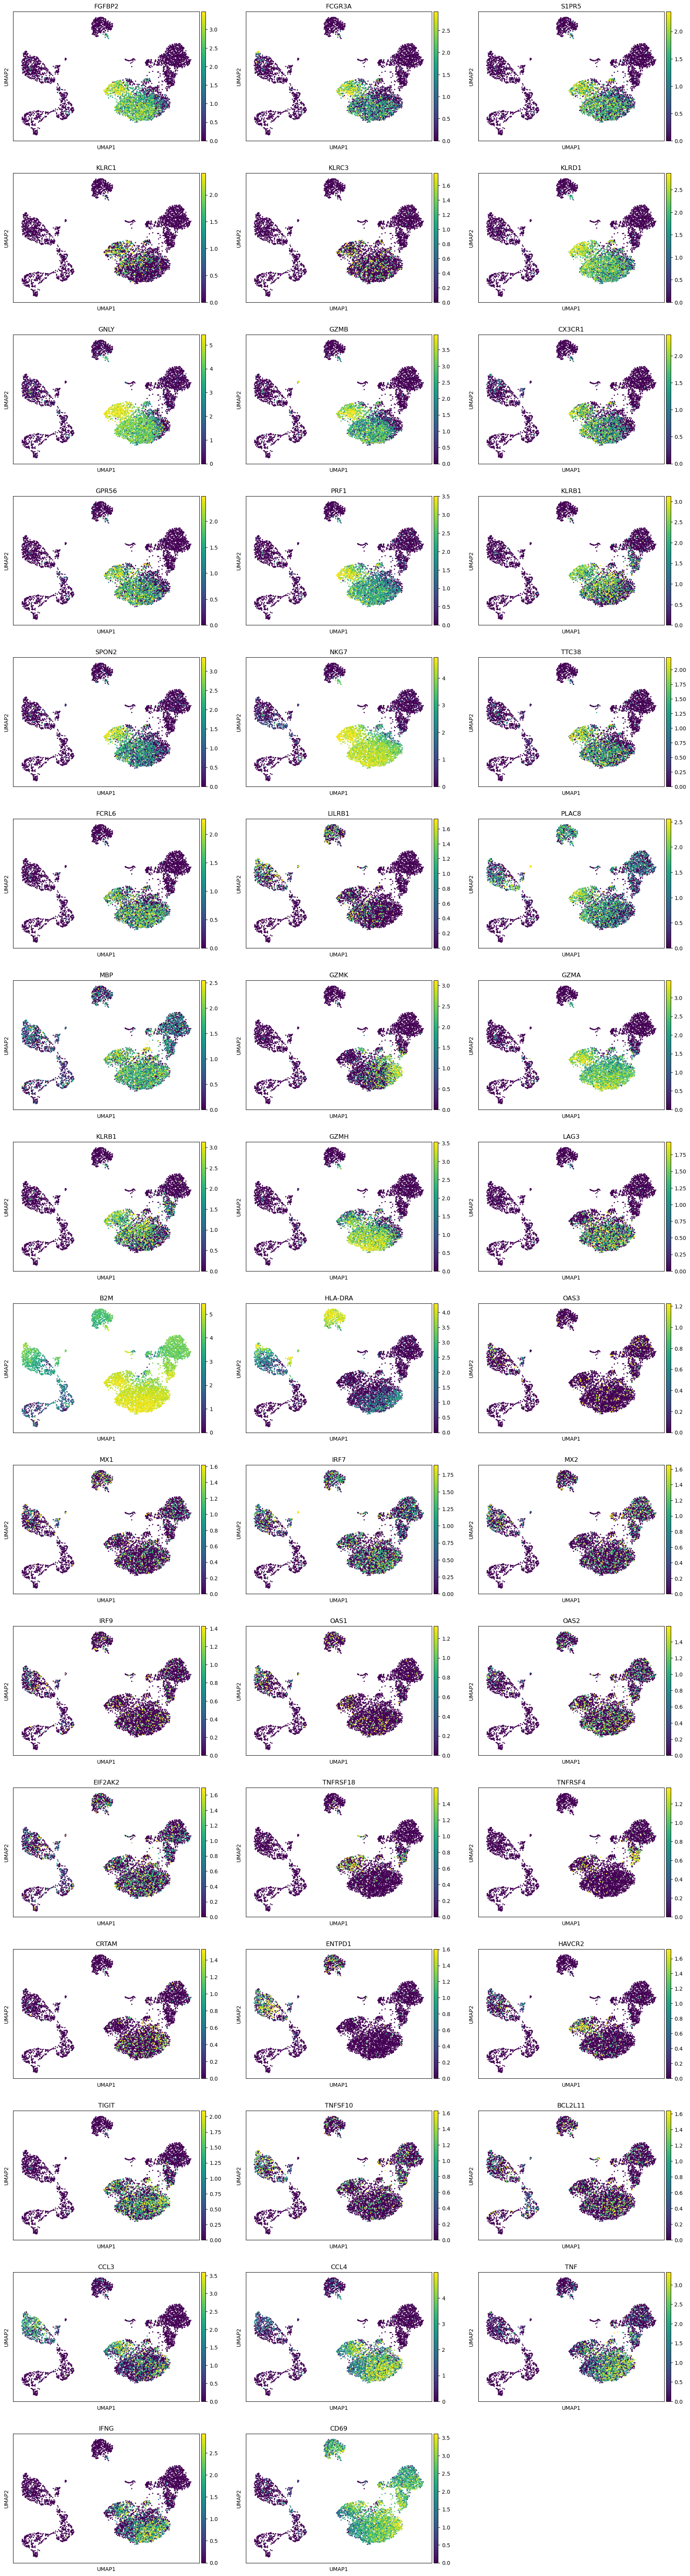

In [64]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

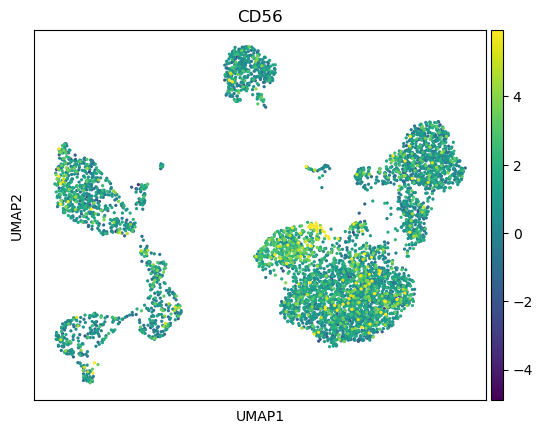

In [65]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

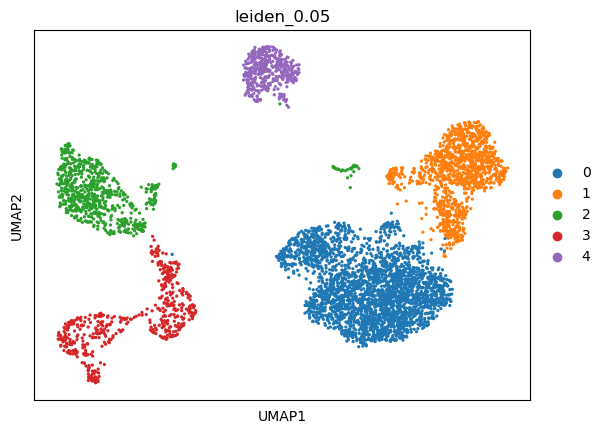

In [66]:
sc.tl.leiden(adata_merged, resolution = 0.05, key_added = "leiden_0.05")

sc.pl.umap(adata_merged, color=['leiden_0.05'], ncols =3)

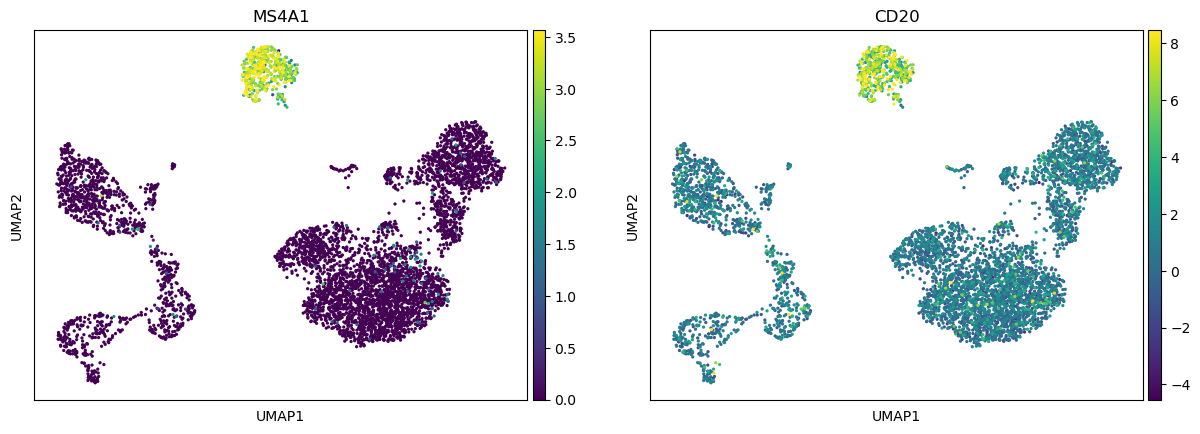

In [67]:
#B cell markers

sc.pl.umap(adata_merged, color=['MS4A1', 'CD20'], ncols =3, vmax="p99")

- Based on marker genes + proteins, cluster 0 represents NK cells and cluster cluster 4 B cells. 

In [68]:
adata_merged

AnnData object with n_obs × n_vars = 5469 × 11572
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.05'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'd

In [69]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/AA_norm.h5ad')

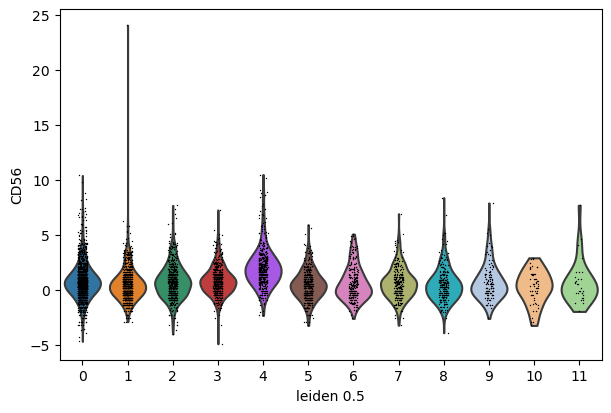

In [35]:
sc.pl.violin(adata_merged, ['CD56'], groupby='leiden_0.5')

## Clustering by protein expression

In [41]:
adata_merged_prot = adata_merged.copy()

In [42]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged_prot, use_rep="protein_expression_dsb")    

sc.tl.umap(adata_merged_prot)

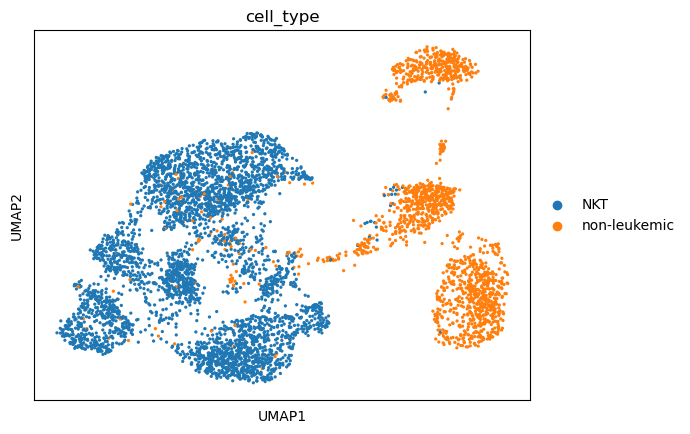

In [43]:

sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

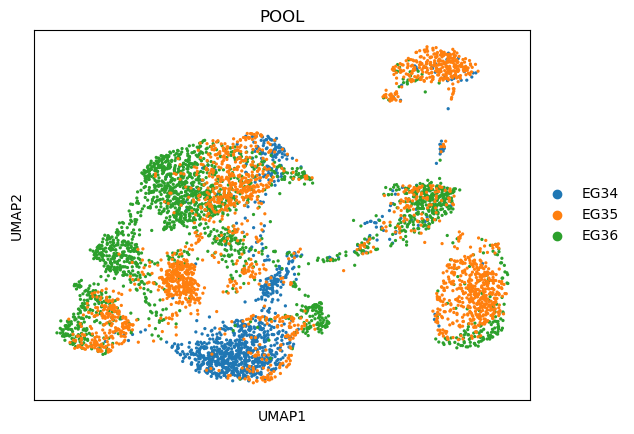

In [49]:
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

## Clustering by RNA

In [45]:
adata_merged_rna = adata_merged.copy()

In [46]:
sc.pp.pca(adata_merged_rna)

In [47]:
#calculating neighbors

sc.pp.neighbors(adata_merged_rna)

sc.tl.umap(adata_merged_rna)

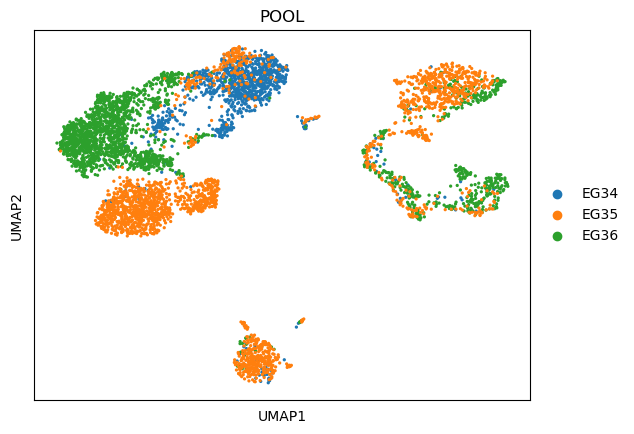

In [50]:
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

## Summary

Latent


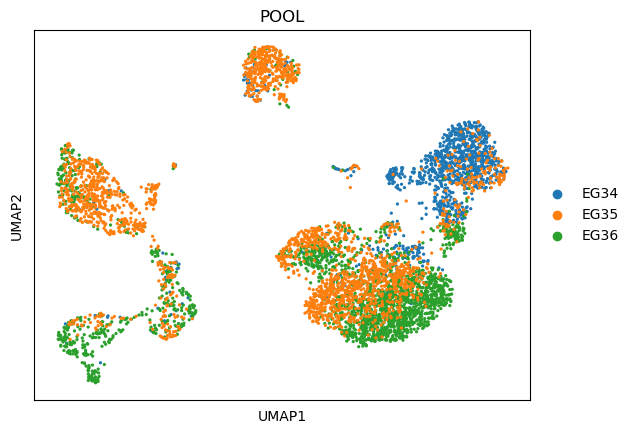

Protein


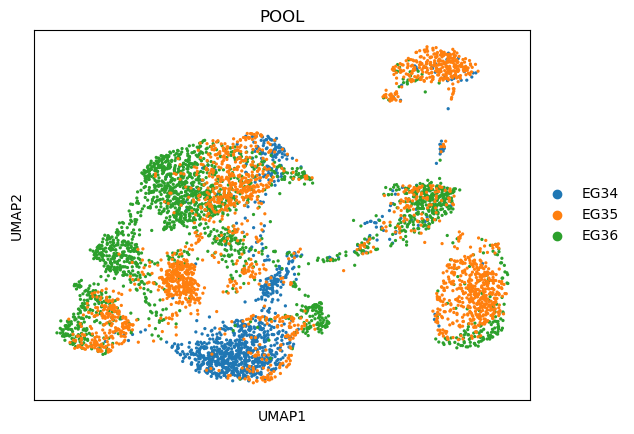

RNA


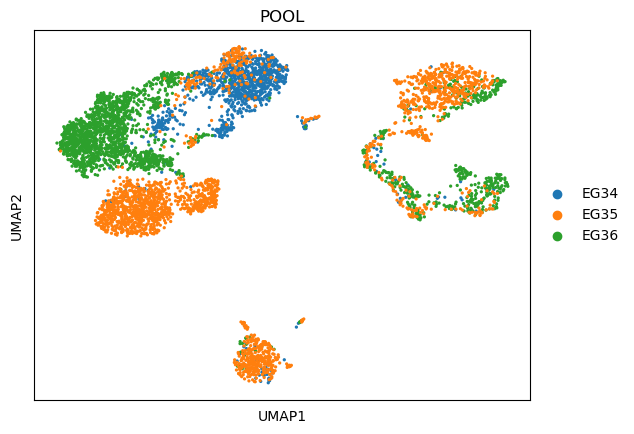

In [52]:
print("Latent")
sc.pl.umap(adata_merged, color = ['POOL'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

Latent


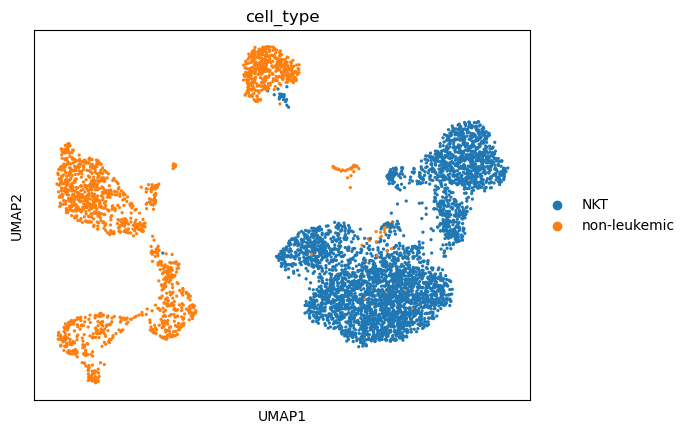

Protein


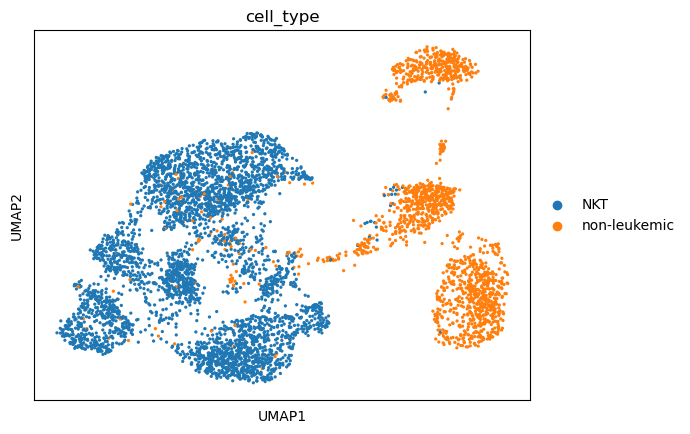

RNA


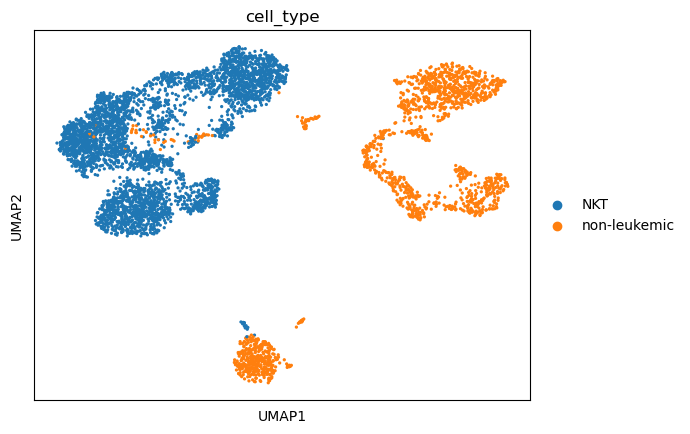

In [53]:
print("Latent")
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['cell_type'], color_map = 'viridis')